<a href="https://colab.research.google.com/github/jun604/AI_Assignment/blob/main/%5BAI2025_Assignment4%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2025-12-14 17:15:29.251522: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-14 17:15:30.749478: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-14 17:15:33.455527: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


### Data Preparation
Use CIFAR10 handwriting dataset

In [3]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [4]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

model = tf.keras.models.Sequential([
    data_augmentation,

    # Convolutional layer. Learn 64 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(
        64, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)
    ),
    tf.keras.layers.BatchNormalization(),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Convolutional layer. Learn 128 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Convolutional layer. Learn 246 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # GlobalAveragePooling2D units
    tf.keras.layers.GlobalAveragePooling2D(),
    

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.4),

    # Add an output layer with output units for all 10 digits
    tf.keras.layers.Dense(10, activation="softmax")
])

2025-12-14 17:15:39.798192: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile and Train neural network

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/10


2025-12-14 17:15:41.140669: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 254s 160ms/step - accuracy: 0.3866 - loss: 1.6787
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 160ms/step - accuracy: 0.4903 - loss: 1.4105
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 247s 158ms/step - accuracy: 0.5321 - loss: 1.3106
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 159ms/step - accuracy: 0.5576 - loss: 1.2431
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 158ms/step - accuracy: 0.5768 - loss: 1.1942
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 248s 159ms/step - accuracy: 0.5925 - loss: 1.1582
Epoch 7/10
1002/1563 ━━━━━━━━━━━━━━━━━━━━ 1:29 160ms/step - accuracy: 0.6024 - loss: 1.1331

KeyboardInterrupt: 

## Evaluate neural network performance


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

2025-12-14 17:06:27.435844: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 6s - 20ms/step - accuracy: 0.6952 - loss: 0.9145


[0.9145371913909912, 0.6952000260353088]

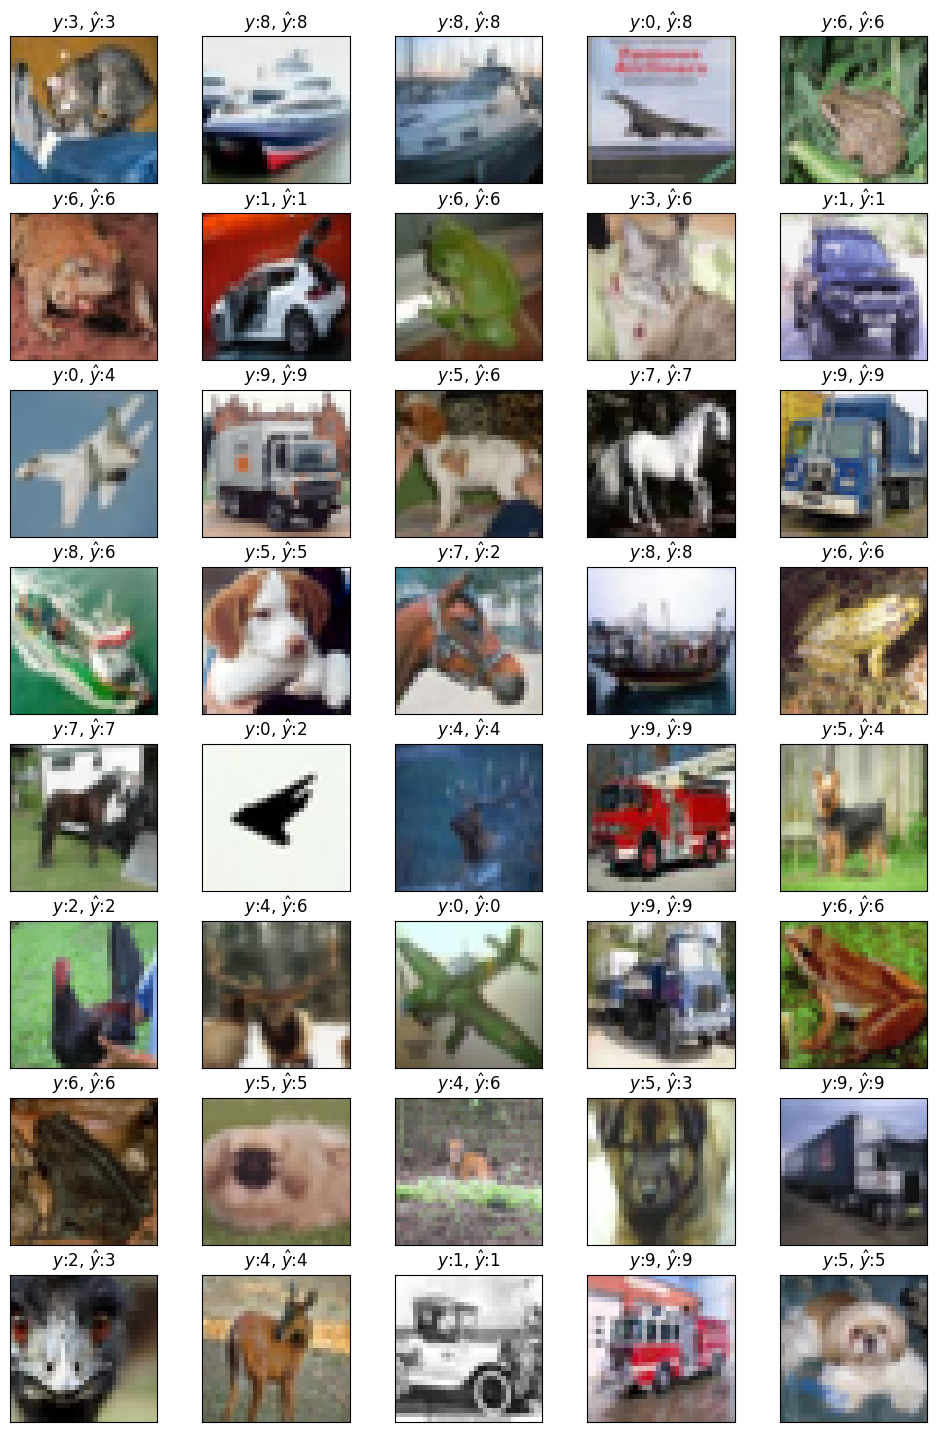

2025-12-14 17:06:39.720449: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


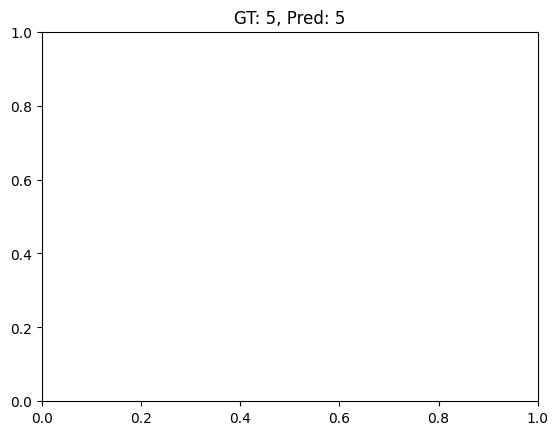

In [ ]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()
true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[i].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


2025-12-14 17:06:45.993670: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


Test Accuracy: 0.6952000260353088
